In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('nse_india.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,06-Apr-2021,14737.00,14779.10,14573.90,14683.50,474211156,31885.97
1,07-Apr-2021,14716.45,14879.80,14649.85,14819.05,476382016,35184.96
2,08-Apr-2021,14875.65,14984.15,14821.10,14873.80,503728173,34444.56
3,09-Apr-2021,14882.65,14918.45,14785.65,14834.85,498347599,35010.36
4,12-Apr-2021,14644.65,14652.50,14248.70,14310.80,638475842,43433.24


In [4]:
df.shape

(247, 7)

In [5]:
X = df.iloc[:, 1:4].values
y = df.iloc[:, 4].values

In [6]:
X[0]

array([14737. , 14779.1, 14573.9])

In [7]:
n = len(X)
X0 = np.ones(n)

In [8]:
X = np.c_[X0, X]

In [9]:
X[0]

array([1.00000e+00, 1.47370e+04, 1.47791e+04, 1.45739e+04])

In [10]:
beta = np.zeros(X.shape[1])

In [11]:
beta

array([0., 0., 0., 0.])

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
minmax = MinMaxScaler()
X_scaled = minmax.fit_transform(X)

In [18]:
y_scaled = minmax.fit_transform(y.reshape(-1,1))

In [20]:
y_scaled[:5]

array([[0.09259326],
       [0.12501644],
       [0.13811249],
       [0.12879576],
       [0.00344444]])

In [28]:
def cost_function(x,y,b):
    y_pred = np.dot(x,b)
    mse = (1/n) * np.sum((y_pred - y) ** 2)
    return mse

In [29]:
def gradient_descent(x,y,epochs,alpha):
    beta = np.zeros(X.shape[1])
    cost_history = []
    for i in range(epochs):
        y_pred = np.dot(x,beta)
        loss = y_pred - y
        grad_beta = (2/n) * np.dot(x.T, loss)
        beta = beta - grad_beta * alpha
        cost_history.append(cost_function(x,y,beta))
    return beta, cost_history

In [60]:
epochs = 200
alpha = 0.01
coef, cost = gradient_descent(X_scaled, y_scaled.flatten(), epochs, alpha)

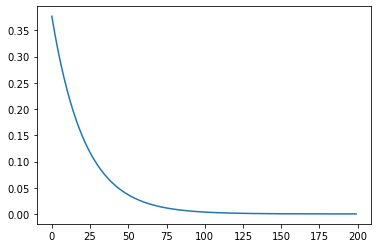

In [61]:
plt.plot(cost)

In [62]:
predictions = np.dot(X_scaled, coef)

In [63]:
predictions[:5]

array([0.10375127, 0.11613262, 0.14984389, 0.14237857, 0.0613439 ])

In [64]:
y_pred = minmax.inverse_transform(predictions.reshape(-1,1))

In [65]:
y[:5]

array([14683.5 , 14819.05, 14873.8 , 14834.85, 14310.8 ])

In [66]:
y_pred[:5]

array([[14730.14775115],
       [14781.90985752],
       [14922.84487619],
       [14891.63495532],
       [14552.85737996]])

In [51]:
y_pred = np.dot(X_scaled, beta)

In [52]:
loss = y_pred - y_scaled.flatten()

In [53]:
X_scaled.shape

(247, 4)

In [54]:
loss.shape

(247,)

In [55]:
grad_beta = (2/n) * np.dot(X_scaled.T, loss)

In [56]:
grad_beta.shape

(4,)

In [57]:
beta

array([0., 0., 0., 0.])

In [58]:
beta = beta - grad_beta * alpha

In [59]:
beta

array([0.        , 0.00775336, 0.00783575, 0.00778419])